In [11]:
from typing import Self
import numpy as np

class CameraMatrix:
    __slots__ = ('m',)

    def __init__(self, m: np.ndarray) -> None:
        self.m = m

    def __matmul__(self, p: np.ndarray) -> np.ndarray:
        p = [p[0], p[1], 1]
        projected = self.m @ p
        return projected[:-1]
    
    def __str__(self) -> str:
        return str(self.m)
    
    def __repr__(self) -> str:
        return str(self.m)

class Camera:

    def __init__(self, window_size: np.ndarray, positon: np.ndarray, zoom: float = 1.0) -> None:
        
        self.position = positon
        self.zoom = zoom

        self._window_shift: np.ndarray = np.array([
            [1, 0, window_size[0] / 2],
            [0, 1, window_size[1] / 2],
            [0, 0, 1]
        ])

        self.worldToScreen: CameraMatrix = None
        self.screenToWorld: CameraMatrix = None
        self.update()

    def update(self):

        translation = np.array([
            [1, 0, -self.position[0]],
            [0, 1, -self.position[1]],
            [0, 0, 1]
        ])

        scaling = np.array([
            [self.zoom, 0, 0],
            [0, self.zoom, 0],
            [0, 0, 1]
        ])

        self.worldToScreen = CameraMatrix(self._window_shift @ scaling @ translation)
        self.screenToWorld = CameraMatrix(np.linalg.inv(self.worldToScreen))


    def moveBy(self, by: np.ndarray):
        self.position = self.position + by
        self.update()

    def zoomBy(self, by: float):
        self.zoom += by
        self.update()


c = CameraMatrix(np.random.random((3, 3)))
c @ np.random.random(2)


array([0.64999744, 1.03000474])

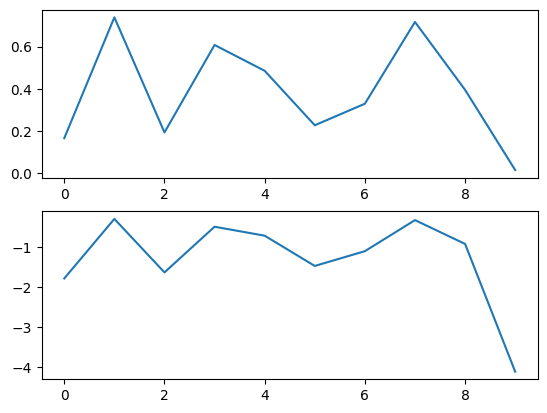

In [53]:
import numpy as np
from matplotlib import pyplot as plt
samples = np.random.random(10)

fig, ax = plt.subplots(2)

log_samples = np.log(samples)

ax[0].plot(samples, label="samples")
ax[1].plot(log_samples, label="log")

plt.show()


In [62]:
import numpy as np

l = np.arange(10 * 10).reshape((10, 10))

from_coord = (1, 1)
to_coord = (3, 3)

print(l)
print(l[1:4, 1:3])

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]
[[11 12]
 [21 22]
 [31 32]]


In [74]:
l = np.arange(6).reshape((3, 2))

l[((0, 0), (1, 0))]

array([1, 0])

In [142]:
wsize_f = 20
wsize = np.array([-wsize_f, wsize_f])
TL_world = np.array([-wsize_f, -wsize_f])
size = 2
walls = np.random.choice([0, 1], size=(20, 20))
pos = np.random.random((8, 2)) * 10 - 5
tomid = np.ones(2) * (size / 2)
tobr = np.ones(2) * (size)

walls

array([[1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1],
       [0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0],
       [1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0],
       [1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1],
       [0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1],
       [0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0],
       [1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1],
       [1, 1, 1, 1, 0, 1, 0, 1, 1,

In [173]:


def vectorized_world_to_cell(positions: np.ndarray) -> np.ndarray:
    """
    positions (n_entities, 2)
    """
    positions = positions - TL_world
    return (positions // size).astype(int)

def vectorized_cell_to_world(positions: np.ndarray, placement: int = 1) -> np.ndarray:
    out = (positions).astype(float) * size + TL_world

    if placement == 1:
        out = out + tomid

    if placement == 2:
        out = out + tobr
    
    
    return out


cell_inds = vectorized_world_to_cell(pos)
cell_pos = vectorized_cell_to_world(cell_inds)
wall_inds = tuple(cell_inds.T)

wall_value = walls[wall_inds]
collide_mask = np.isclose(wall_value, 0.0)
print(collide_mask.sum()) 

# Collision
collision_cell_pos = cell_pos[collide_mask]
collision_ent_pos = pos[collide_mask]

# Find push vector cell pos -> ent pos + handle case where cell pos == ent pos
same_pos_mask = collision_cell_pos == collision_ent_pos
collision_ent_pos[same_pos_mask] = (
    collision_ent_pos[same_pos_mask] +
    0.01 * np.random.random(collision_ent_pos[same_pos_mask].shape)
)
collision_push_vector = collision_ent_pos - collision_cell_pos

# Normalize 
collision_push_mag = np.linalg.norm(collision_push_vector, axis=1)
collision_push_vector = collision_push_vector / collision_push_mag[:, np.newaxis]

# Find the distance between the ent ant the grid cell
collision_cell_TL = collision_cell_pos - tomid
collision_cell_BR = collision_cell_pos + tomid

collison_rect_dx = np.min(
    np.vstack((collision_ent_pos[:, 0] - collision_cell_TL[:, 0],
    collision_cell_BR[:, 0] - collision_ent_pos[:, 0])),
    axis=0
)
collison_rect_dy = np.min(
    np.vstack((collision_ent_pos[:, 1] - collision_cell_TL[:, 1],
    collision_cell_BR[:, 1] - collision_ent_pos[:, 1])),
    axis=0 
)

collision_distance = np.sqrt(collison_rect_dx * collison_rect_dx + collison_rect_dy * collison_rect_dy)
collision_push_vector = collision_push_vector * collision_distance[:, np.newaxis]

pos[collide_mask] = pos[collide_mask] + collision_push_vector
pos




0


array([[-2.05859768e+00, -6.98638172e-01],
       [-2.68603102e+00, -1.88992913e+00],
       [-2.04493063e+00,  1.95838435e+00],
       [-3.55336128e-09,  2.00000000e+00],
       [ 4.98514906e+00, -9.95601678e-01],
       [-2.00000005e+00, -4.00000005e+00],
       [ 3.63724559e+00,  1.69275856e+00],
       [ 2.97349249e+00, -2.85866940e+00]])

In [182]:

def find_closest_points(source_points, target_points):
    # source_points: numpy array of shape (N, 2)
    # target_points: numpy array of shape (4, N, 2)
    
    # Compute the Euclidean distances between each source point and all target points
    # target_points has shape (4, N, 2), source_points has shape (N, 2)
    # We need to broadcast source_points to shape (4, N, 2) to compute distances
    distances = np.linalg.norm(target_points - source_points[np.newaxis, :, :], axis=2)
    
    # Find the index of the closest target point for each source point
    closest_indices = np.argmin(distances, axis=0)
    
    # Use the indices to select the closest target points
    closest_points = target_points[closest_indices, np.arange(source_points.shape[0])]
    
    return closest_points

# Example usage:
N = 5  # Number of points
source_points = np.random.rand(N, 2)
target_points = np.random.rand(4, N, 2)
find_closest_points(source_points, target_points)

array([[0.67860895, 0.95341899],
       [0.52205924, 0.2715618 ],
       [0.56121469, 0.05312261],
       [0.32606696, 0.66470282],
       [0.65989488, 0.09460009]])

In [195]:
import numpy as np

c1 = np.arange(10).reshape((5, 2))
c2 = np.arange(10).reshape((5, 2))
c3 = np.arange(10).reshape((5, 2))

o = np.array([c1, c2, c3]).reshape((-1, 2))
o


array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9],
       [0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9],
       [0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [200]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [120]:
import math

def distance(rect, p):
    dx = max(rect['min']['x'] - p['x'], p['x'] - rect['max']['x'])
    dy = max(rect['min']['y'] - p['y'], p['y'] - rect['max']['y'])
    return math.sqrt(dx * dx + dy * dy)

rect = {
    'min': {'x': 1, 'y': 2},
    'max': {'x': 4, 'y': 6}
}

p = {'x': 3, 'y': 3}

print(distance(rect, p))  # Output will be the distance

1.4142135623730951
